Please enter your budget level from the list(Inexpensive,Moderate,Expensive,Very Expensive): Moderate
Please enter the region you want to travel (Midwest,Northeast,South,West): Midwest
    Name
 Chicago
Please select destination city: Chicago
Please enter the area of your interests(all,dining,shopping,museums,sports,spas):dining
Please enter place type (bar,cafe,casino,night_club,restaurant,shopping_mall): bar
                                            name  \
13                                      Matchbox   
0                                The Violet Hour   
30                             Delilah's Chicago   
54                        The California Clipper   
36                                       Sparrow   
49                                The Victor Bar   
17                                   The Up Room   
16                                       Vol. 39   
21                                Ludlow Liquors   
19                                 The Milk Room   
10            

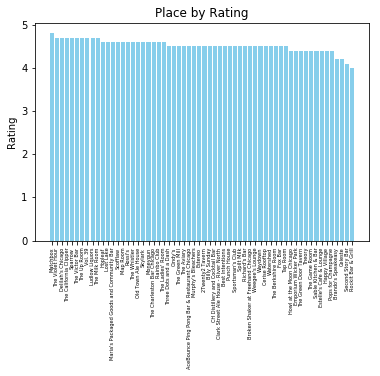

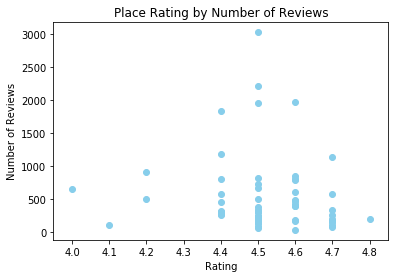

Do you want to enter another place type (Yes or No): No
Have a good vacation time!


In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import requests
import pprint
from config import gkey
import time

city_df=pd.read_csv("cost_of_living_region_state_division.csv")

city_df["Budget_Level"]=pd.cut(city_df["Index"],4,labels=["Inexpensive","Moderate","Expensive","Very Expensive"])
#print(city_df.columns)
bl=["Inexpensive","Moderate","Expensive","Very Expensive"]


budget_level=input("Please enter your budget level from the list(Inexpensive,Moderate,Expensive,Very Expensive): ")

region=input("Please enter the region you want to travel (Midwest,Northeast,South,West): ")


if budget_level in bl:
    df1=city_df[["Name"]][(city_df.Budget_Level==budget_level) & (city_df.Region==region)]
    print(df1.to_string(index=False))
    #print(city_df[["Name"]][city_df.Budget_Level==budget_level])
else:
    print("Wrong input")

city_name=input("Please select destination city: ")





########################################################

while 1==1:

    # Ask user enter  place type
    location=city_name

    area_int=input("Please enter the area of your interests(all,dining,shopping,museums,sports,spas):")
   
    if area_int== "all":
        type=input("Please enter place type (hotel,amusement_park,bar,cafe,casino,museum,night_club,restaurant,shopping_mall,spa,stadium,zoo): ")
    elif area_int== "dining":
        type=input("Please enter place type (bar,cafe,casino,night_club,restaurant,shopping_mall): ")
    elif area_int== "shopping":
        type=input("Please enter place type (shopping_mall): ")
    elif area_int== "museums":
        type=input("Please enter place type (museums,zoo): ")
    elif area_int=="sports":
        type=input("Please enter place type (amusement_park,stadium): ")
    elif area_int=="spas":
        type=input("Please enter place type (spas): ")      
   




    query=type+" in "+location

    # Build URL
    url="https://maps.googleapis.com/maps/api/place/textsearch/json?query="+query+"&key="+gkey

    # Set URL
    response = requests.get(url)

    # Send URL request to Google API
    response_json = response.json()

    # Create column-lists from JSON
    list_name = [item["name"] for item in response_json["results"]]
    list_address = [item["formatted_address"] for item in response_json["results"]]
    list_rating = [item["rating"] for item in response_json["results"]]
    list_user_ratings_total = [item["user_ratings_total"] for item in response_json["results"]]

    # Create DataFrame from column-list
    df=pd.DataFrame({"name":list_name,"address":list_address,"rating":list_rating,"user_ratings_total":list_user_ratings_total})

   
   
    # Validate if next page token exist
    try:
        token=response_json["next_page_token"]
        time.sleep(5)
    except:
        token=0


    # Repeat 2nd time all steps again for next page
    if token!=0:
        url="https://maps.googleapis.com/maps/api/place/textsearch/json?pagetoken="+token+"&key="+gkey

        response = requests.get(url)
        response_json = response.json()

        list_name = [item["name"] for item in response_json["results"]]
        list_address = [item["formatted_address"] for item in response_json["results"]]
        list_rating = [item["rating"] for item in response_json["results"]]
        list_user_ratings_total = [item["user_ratings_total"] for item in response_json["results"]]

        df2=pd.DataFrame({"name":list_name,"address":list_address,"rating":list_rating,"user_ratings_total":list_user_ratings_total})
        df=pd.concat([df,df2], ignore_index=True)



    # Validate if next page token exist
    try:
        token=response_json["next_page_token"]
        time.sleep(5)
    except:
        token=0

    # Repeat 3rd time all steps again for next page
    if token!=0:
        url="https://maps.googleapis.com/maps/api/place/textsearch/json?pagetoken="+token+"&key="+gkey

        response = requests.get(url)
        response_json = response.json()

        list_name = [item["name"] for item in response_json["results"]]
        list_address = [item["formatted_address"] for item in response_json["results"]]
        list_rating = [item["rating"] for item in response_json["results"]]
        list_user_ratings_total = [item["user_ratings_total"] for item in response_json["results"]]

        df3=pd.DataFrame({"name":list_name,"address":list_address,"rating":list_rating,"user_ratings_total":list_user_ratings_total})
        df=pd.concat([df,df3], ignore_index=True)


    # sort DataFrame by columns
    df=df.sort_values(by=["rating","user_ratings_total"], ascending=False)


    print(df)


    # Bar 'Place by Rating'
    x=df["name"]
    y=df["rating"]

    plt.bar(x,y,color="skyblue")
    plt.xticks(rotation='vertical',fontsize='5')
    plt.ylabel('Rating')
    plt.title('Place by Rating')

    plt.show()


    # Scatter 'Place Rating by Number of Reviews'
    x=df["rating"]
    y=df["user_ratings_total"]

    plt.scatter(x,y,c="skyblue")
    plt.xlabel('Rating')
    plt.ylabel('Number of Reviews')
    plt.title('Place Rating by Number of Reviews')

    plt.show()

    # Ask user to try more place type
    more_loop=input("Do you want to enter another place type (Yes or No): ")

    # Exit from while loop if user answer No or N
    if more_loop.upper() == "NO" or more_loop.upper() == "N":
        print("Have a good vacation time!")
        break




In [ ]:
bar
